In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# from matplotlib import style
import seaborn as sns
%matplotlib inline

from env import get_db_url

In [2]:
url = get_db_url('curriculum_logs')
query = '''
SELECT *
FROM logs
;
'''
df1 = pd.read_sql(query, url)
print(df1.shape)
df1.head()

(900223, 6)


,date,time,path,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [3]:
url = get_db_url('curriculum_logs')
query = '''
SELECT *
FROM cohorts
;
'''
df2 = pd.read_sql(query, url)
print(df2.shape)
df2.head()

(53, 9)


,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
1,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2,3,Carlsbad,#carlsbad,2014-09-04,2014-11-05,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
3,4,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
4,5,Everglades,#everglades,2014-11-18,2015-02-24,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1


In [5]:
# url = get_db_url('curriculum_logs')
# query = '''
# SELECT * 
# FROM logs
# JOIN cohorts as c ON c.id=cohort_id
# ;
# '''
# df = pd.read_sql(query, url)
# print(df.shape)
# df.head()

In [6]:
df = pd.merge(df1, df2, left_on='cohort_id', right_on='id', how='inner')

In [7]:
df.date = pd.to_datetime(df.date)
df = df.set_index(df.date)
df.start_date = pd.to_datetime(df.start_date)
df.end_date = pd.to_datetime(df.end_date)
df.created_at = pd.to_datetime(df.created_at)
df.updated_at = pd.to_datetime(df.updated_at)

In [8]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2018-01-26,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2018-01-26,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2018-01-26,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2018-01-26,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1


# 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [141]:
# Query the databse to retireve the data log and cohorts and joined them
url = get_db_url('curriculum_logs')
query = '''
SELECT * 
FROM logs
JOIN cohorts as c ON c.id=cohort_id;
'''
active_students = pd.read_sql(query, url)
print(active_students.shape)
active_students.head()

(847330, 15)


,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2


In [142]:
# Changing the date to datetime
active_students.date = pd.to_datetime(active_students.date)
active_students = active_students.set_index(active_students.date)
active_students.start_date = pd.to_datetime(active_students.start_date)
active_students.end_date = pd.to_datetime(active_students.end_date)
active_students.created_at = pd.to_datetime(active_students.created_at)
active_students.updated_at = pd.to_datetime(active_students.updated_at)

In [210]:
# Removing the points after the end date for the cohort
active_students = active_students[active_students['date']<active_students['end_date']]
active_students.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,,
2018-01-26,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
2018-01-26,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
2018-01-26,2018-01-26,09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
2018-01-26,2018-01-26,09:56:48,javascript-i/functions,3,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
2018-01-26,2018-01-26,09:56:59,javascript-i/loops,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2


In [144]:
active_students.path.value_counts()

/                                               30286
toc                                             15017
search/search_index.json                        13351
javascript-i                                    13234
java-iii                                         9625
                                                ...  
prework/cli/03-filepaths                            1
mysql//functions                                    1
content/javascript_ii/map-filter-reduce.html        1
java-i/control-statements-and-loops/g               1
capsones/151                                        1
Name: path, Length: 1356, dtype: int64

In [145]:
(active_students.end_date - active_students.start_date).max()

Timedelta('190 days 00:00:00')

In [147]:
# taking a peek at the user_id 2
active_students[active_students['user_id']==2]

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,,
2018-01-26,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
2018-01-26,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
2018-01-26,2018-01-26,09:56:59,javascript-i/loops,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
2018-01-26,2018-01-26,10:43:46,javascript-i/functions,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
2018-01-26,2018-01-26,14:17:17,javascript-i/javascript-with-html,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-10,2018-05-10,17:56:18,slides/jsp_and_jstl,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
2018-05-10,2018-05-10,18:25:26,java-iii,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
2018-05-10,2018-05-10,18:25:32,appendix,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2


# Creating DataFrame with users who accessed the websites by the number of times per date.

In [148]:
# Low activity based on the date
low_activity = active_students.groupby('user_id')[['date', 'path']].nunique()\
.sort_values(by='path', ascending=True)
low_activity

,date,path
user_id,,
918,1,1
940,1,1
619,1,1
879,1,1
278,1,3
...,...,...
685,157,219
692,138,231
627,131,232


# High Activity vs Low Activity

In [149]:
# Getting the average of dates accessed the curriculum
low_activity.mean()

date     72.956224
path    121.606019
dtype: float64

# ```user_id``` Count

In [150]:
# user_id count from original dataframe
df.user_id.nunique()

911

In [151]:
# user_id count from active students dataframe
active_students.user_id.nunique()

731

In [152]:
# user_id's that have less than the average page visits to the site from active_students dataframe
low_activity[low_activity['date']<73]

,date,path
user_id,,
918,1,1
940,1,1
619,1,1
879,1,1
278,1,3
...,...,...
467,72,179
193,70,189
699,67,194


In [211]:
len(low_activity[low_activity['date']<73])

298

In [153]:
# Creating the list of low activity students
low_act_students = low_activity.index.to_list()
# low_act_students

In [155]:
# DataFrame with only the low actitvity students
low_active_df = active_students[active_students['user_id'].isin(low_act_students)]
low_active_df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,,
2018-01-26,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
2018-01-26,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
2018-01-26,2018-01-26,09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
2018-01-26,2018-01-26,09:56:48,javascript-i/functions,3,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
2018-01-26,2018-01-26,09:56:59,javascript-i/loops,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2


In [156]:
# Columns in DataFrame
low_active_df.columns

Index(['date', 'time', 'path', 'user_id', 'cohort_id', 'ip', 'id', 'name',
       'slack', 'start_date', 'end_date', 'created_at', 'updated_at',
       'deleted_at', 'program_id'],
      dtype='object')

In [157]:
# Dropping the columns not being used to plot
plot_low_active = low_active_df.drop(columns=['date', 'time', 'path', 'user_id', 'cohort_id', 'id',
       'name', 'slack', 'start_date', 'end_date', 'created_at', 'updated_at',
       'deleted_at', 'program_id'])

In [158]:
# Data to plot activity
plot_low_active.resample('d').count()

,ip
date,
2018-01-26,496
2018-01-27,188
2018-01-28,145
2018-01-29,725
2018-01-30,488
...,...
2021-04-17,304
2021-04-18,483
2021-04-19,1683


<Axes: xlabel='date'>

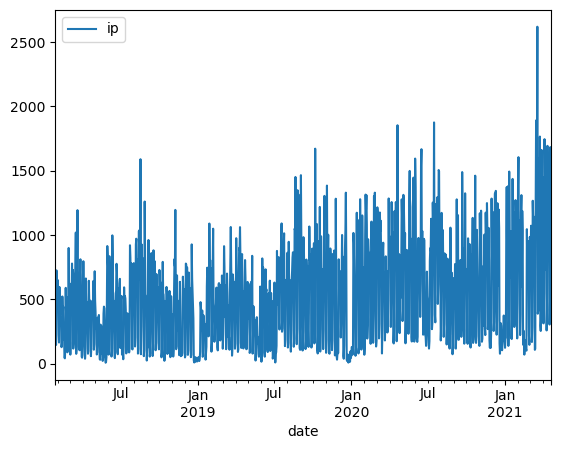

In [159]:
# Plotting the Data
plot_low_active.resample('d').count().plot()

In [160]:
low_active_df

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,,
2018-01-26,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
2018-01-26,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
2018-01-26,2018-01-26,09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
2018-01-26,2018-01-26,09:56:48,javascript-i/functions,3,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
2018-01-26,2018-01-26,09:56:59,javascript-i/loops,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,2021-04-21,16:36:09,jquery/personal-site,869,135.0,136.50.98.51,135,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,None,2
2021-04-21,2021-04-21,16:36:34,html-css/css-ii/bootstrap-grid-system,948,138.0,104.48.214.211,138,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,None,2
2021-04-21,2021-04-21,16:37:48,java-iii,834,134.0,67.11.50.23,134,Luna,#luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,None,2


In [161]:
last_active_day = low_active_df.groupby('user_id')['date', 'end_date'].max()
last_active_day['days_apart_from_end_date'] = last_active_day.end_date-last_active_day.date

In [222]:
last_active_day = last_active_day.sort_values(by='days_apart_from_end_date', ascending=False)
last_active_day.head()

,date,end_date,days_apart_from_end_date
user_id,,,
772,2020-09-23,2021-03-30,188 days
697,2020-07-13,2021-01-12,183 days
663,2020-12-08,2021-06-08,182 days
679,2020-07-14,2021-01-12,182 days
839,2020-12-14,2021-06-08,176 days


# Findings

In [234]:
# 
days_from_end_df = pd.DataFrame(last_active_day.days_apart_from_end_date.value_counts(normalize=True).sort_values(ascending=False))
days_from_end_df['user_count'] = last_active_day.days_apart_from_end_date.value_counts().sort_values(ascending=False)
days_from_end_df.head(10)

,days_apart_from_end_date,user_count
1 days,0.145007,106
2 days,0.087551,64
3 days,0.065663,48
135 days,0.061560,45
4 days,0.051984,38
6 days,0.041040,30
7 days,0.041040,30
48 days,0.035568,26
5 days,0.034200,25
89 days,0.030096,22


## Number of users with random last day access/log in

In [242]:
days_from_end_df[days_from_end_df['user_count']==1].head(50)

,days_apart_from_end_date,user_count
116 days,0.001368,1
137 days,0.001368,1
134 days,0.001368,1
123 days,0.001368,1
120 days,0.001368,1
117 days,0.001368,1
129 days,0.001368,1
111 days,0.001368,1
130 days,0.001368,1
55 days,0.001368,1


In [240]:
len(days_from_end_df[days_from_end_df['user_count']==1])

62

In [236]:
one_day_list = low_activity[low_activity['date']==1]
one_day_list

,date,path
user_id,,
918,1,1
940,1,1
619,1,1
879,1,1
278,1,3
832,1,3
388,1,4
539,1,5
812,1,6


In [214]:
len(one_day_list)

14

# Summary

* Used 73 as the number of time logged into site to determine low activity
* 14 User that only checked the website one day
* 14 % of the low activity users last logged onto the currilculum  one day before end date
* 6 % of low actvitiy users last loggeed in 135 days before end date

- The average user logged into the currculum 73 times. So all users who averaged less were considered as 'hardly access'. Also, we took into account dates during their cohort compleation time.

- The last day most users logged into the curriculum was one day before ```end_date``` with 14%. Noteworthy is the forth spot with 45 users that last day access was 135 days before ```end_date```. Followed by the other notables: 48 days and 89 days with the 8th and 10th spot, respectively.

- There were a total of 14 users that simply accessed the curriculun one day and nevre again logged in.

- 62 users had random days asscoiated with their last log in before ```end_date``` ranging from 19 days all the way up to 183 days.

# 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [176]:
df.ip.value_counts()

97.105.19.58       268648
97.105.19.61        60530
192.171.117.210      9124
71.150.217.33        6791
76.185.145.231       4754
                    ...  
172.14.106.110          1
172.58.96.108           1
172.56.21.254           1
184.203.143.190         1
172.56.14.200           1
Name: ip, Length: 5200, dtype: int64

In [182]:
df.groupby('ip')['date'].count().sort_values(ascending=False)

ip
97.105.19.58       268648
97.105.19.61        60530
192.171.117.210      9124
71.150.217.33        6791
76.185.145.231       4754
                    ...  
107.77.100.113          1
92.38.148.50            1
172.58.99.238           1
172.58.99.231           1
107.77.64.50            1
Name: date, Length: 5200, dtype: int64

In [206]:
df.groupby(df.date)['user_id', 'ip'].nunique().sort_values(by='user_id', ascending=False)

,user_id,ip
date,,
2021-04-12,194,196
2021-04-15,183,191
2021-04-19,174,179
2021-03-15,174,181
2021-04-16,173,180
...,...,...
2019-11-28,5,6
2019-07-04,5,6
2019-01-05,5,5


In [201]:
df[df['date']=='2019-11-28'][['user_id', 'ip']]

,user_id,ip
date,,
2019-11-28,271,209.107.189.151
2019-11-28,271,209.107.189.151
2019-11-28,271,209.107.189.151
2019-11-28,271,209.107.189.151
2019-11-28,271,209.107.189.151
2019-11-28,271,209.107.189.151
2019-11-28,271,209.107.189.151
2019-11-28,271,209.107.189.151
2019-11-28,271,209.107.189.151


In [209]:
df.groupby('cohort_id')['user_id', 'ip', 'path'].nunique().sort_values(by='path', ascending=False)

,user_id,ip,path
cohort_id,,,
28.0,51,318,1404
22.0,35,226,544
34.0,23,216,533
14.0,13,35,486
25.0,26,410,421
59.0,29,245,420
55.0,21,266,418
23.0,33,251,406
17.0,14,74,383
